<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77140 entries, 0 to 77139
Data columns (total 15 columns):
idx                    77140 non-null object
veh_ref                77140 non-null int64
cas_ref                77140 non-null int64
cas_clas               77139 non-null float64
sex_cas                77140 non-null int64
age_cas                77140 non-null int64
age_band               77140 non-null int64
cas_sev                77140 non-null int64
ped_loc                77140 non-null int64
ped_mov                77140 non-null int64
car_passen             77140 non-null int64
bus_or_coach_pass      77140 non-null int64
ped_rd_maint_worker    77140 non-null int64
cas_type               77140 non-null int64
cas_hom_area_type      77140 non-null int64
dtypes: float64(1), int64(13), object(1)
memory usage: 8.8+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77140 entries, 0 to 77139
Data columns (total 12 columns):
cas_clas               77139 non-null float64
sex_cas   

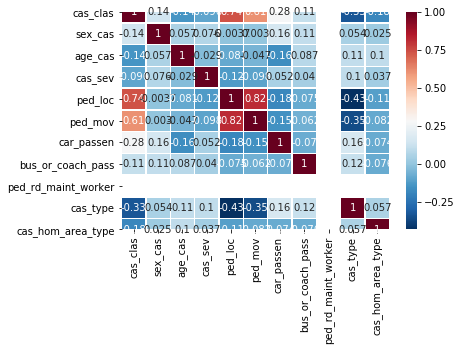

In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix

cols=["idx",
      "veh_ref",
      "cas_ref",
      "cas_clas",
      "sex_cas",
      "age_cas",
      "age_band",
      "cas_sev",
      "ped_loc",
      "ped_mov",
      "car_passen",
      "bus_or_coach_pass",
      "ped_rd_maint_worker",
      "cas_type",
      "cas_hom_area_type"]
df=pd.read_csv("Casualties.csv" , names=cols ,skiprows=2)
df.head()
df.info()
# all columns are numerica , except index column
# index columns is object and we dont need  this column for  our
# classification
df.drop(['idx','veh_ref','cas_ref'] ,axis=1, inplace=True)
df.info()
# to check any column has null values
df.isnull().sum()
# output shows that casuality class has one null value.
df.head()
# since it is category type , we repalce with high frequency or drop the row
#  i had removed that row by dropna() method
df.dropna(inplace=True)
df.isnull().sum()
# now   none of the column have null values.
df.shape
# age_clas and age_band have correlation 0.96 
# so we can remove one.
# drop one column, i drop age_band
df.drop(['age_band'] ,axis=1, inplace=True)
df.head()
X=df[["cas_clas",
      "sex_cas",
      "age_cas",
      "ped_loc",
      "ped_mov",
      "car_passen",
      "bus_or_coach_pass",
      "ped_rd_maint_worker",
      "cas_type",
      "cas_hom_area_type"]]
y=df['cas_sev']
# Pearson correlation coefficient
pearsoncorr = df.corr(method='pearson')
import seaborn as sb
sb.heatmap(pearsoncorr, 
            xticklabels=pearsoncorr.columns,
            yticklabels=pearsoncorr.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)


X_train, X_test, Y_train, Y_test = train_test_split(X, y, random_state=0)
from sklearn import svm

from sklearn.svm import SVC # "Support vector classifier"  
classifier = SVC(kernel='linear', random_state=0)  
classifier.fit(X_train, Y_train)  
y_pred=classifier.predict(X_test)
cm=confusion_matrix(Y_test, y_pred)
print("\n Confusion Matrix Using Support Vector Machine")
print("================================================")
print(cm)
accuracy=metrics.accuracy_score(Y_test,y_pred)
print("\n Accuracy  Using Support Vector Machine")
print("==========================================")
print(accuracy)
# we found that using Random Forest model we ar

# Random Forests in `scikit-learn` (with N = 100)
rf = RandomForestClassifier(n_estimators=100,
                            random_state=0)
rf.fit(X_train, Y_train)

y_pred=rf.predict(X_test)
cm=confusion_matrix(Y_test, y_pred)
print("\n Confusion Matrix using Random Forest")
print("========================================")
print(cm)
accuracy=metrics.accuracy_score(Y_test,y_pred)
print("\n Accuracy ")
print("======================================")
print(accuracy)
print("======================================")
# we found that using Random Forest model we are able to 
#  classify casual_severity level with accurancy  87 %.

# Fitting Naive Bayes to the Training set  
from sklearn.naive_bayes import GaussianNB  
classifier = GaussianNB()  
classifier.fit(X_train, Y_train)  
# Predicting the Test set results  
y_pred = classifier.predict(X_test)
cm=confusion_matrix(Y_test, y_pred)
print("\n Confusion Matrix using Naives Model")
print("========================================")
print(cm)
accuracy=metrics.accuracy_score(Y_test,y_pred)
print("\n Accuracy Using Naives Model ")
print("======================================")
print(accuracy)
print("======================================")
#Fitting Decision Tree classifier to the training set  
from sklearn.tree import DecisionTreeClassifier  
classifier= DecisionTreeClassifier(criterion='entropy', random_state=0)  
classifier.fit(X_train, Y_train)  
#Predicting the test set result  
y_pred= classifier.predict(X_test) 
cm=confusion_matrix(Y_test, y_pred)
print("\n Confusion Matrix using Decision Tree Model")
print("==============================================")
print(cm)
accuracy=metrics.accuracy_score(Y_test,y_pred)
print("\n Accuracy Using Decision Tree Model")
print("======================================")
print(accuracy)
print("======================================") 
